In [91]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('ggplot')
%matplotlib inline 
pd.set_option('display.max_columns', 400)

In [92]:
epl_df = pd.read_csv('/kaggle/input/english-premier-league202021/EPL_20_21.csv')
epl_df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [100]:
epl_df = epl_df.rename(columns={'Position': 'Position/s', 
                                'Matches': 'Matches_played', 
                                'Mins': 'Total_mins_played'})

In [102]:
epl_df['Mins_per_match'] = (epl_df['Total_mins_played'] / epl_df['Matches_played']).astype(int)
epl_df['Goals_per_match'] = (epl_df['Goals'] / epl_df['Matches_played']).astype(float)


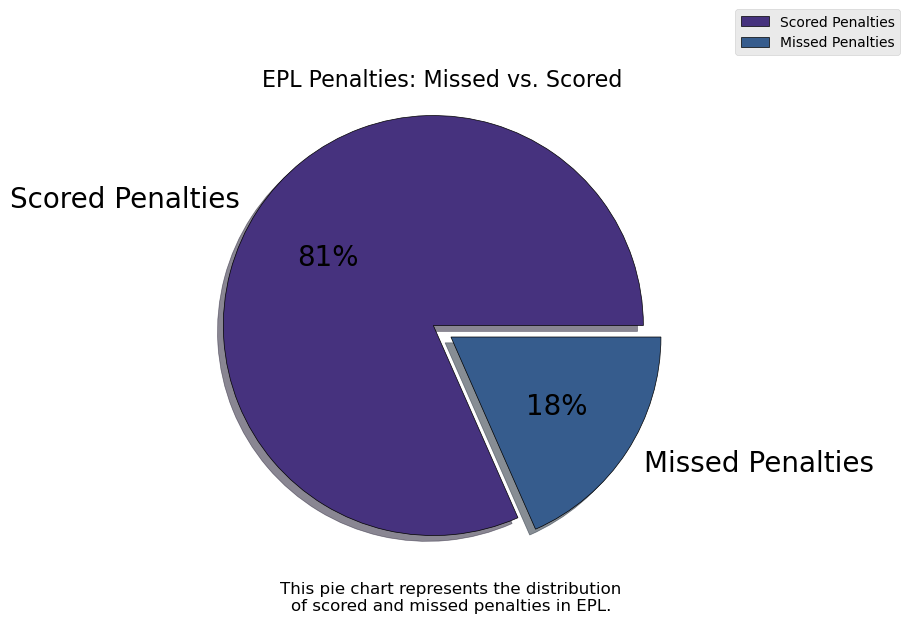

In [150]:
# Calculate total penalties scored and missed
total_pens_scored = epl_df['Penalty_Goals'].sum()
total_pens_missed = epl_df['Penalty_Attempted'].sum() - total_pens_scored

# Data for the pie chart
data = [total_pens_scored, total_pens_missed]
labels = ['Scored Penalties', 'Missed Penalties']
explode = [0.1, 0]  # Adjust the explode values to control the 3D effect

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(data, labels=labels, colors=sns.color_palette('viridis'), autopct='%d%%', explode=explode, shadow=True,
        textprops={'fontsize': 20}, wedgeprops={'edgecolor': 'black'})

#sorting out the texts around the pie
plt.title('EPL Penalties: Missed vs. Scored', fontsize=16)
description = "This pie chart represents the distribution\nof scored and missed penalties in EPL."
plt.text(0, -1.3, description, ha='center', fontsize=12)
plt.legend(loc='upper right', labels=labels, bbox_to_anchor=(1.5, 1.2))

# Ensure the pie chart is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


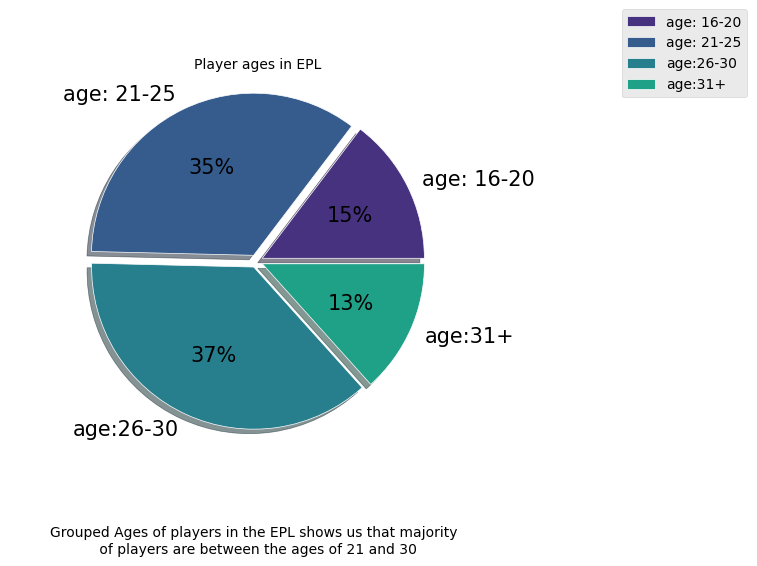

In [149]:
#players based on age group 
under20 = epl_df[epl_df['Age'] <=20]
age20_25 = epl_df[(epl_df['Age'] >20) & (epl_df['Age'] <=25)]
age25_30 = epl_df[(epl_df['Age'] >25) & (epl_df['Age'] <=30)]
over30 = epl_df[epl_df['Age'] >30]


#data for the pie chart 
x = np.array([under20['Name'].count(), age20_25['Name'].count(), age25_30['Name'].count(), over30['Name'].count()])
labels = ['age: 16-20', 'age: 21-25', 'age:26-30', 'age:31+']
explode = [0.04, 0.04, 0.04, 0.04 ]


# Plotting the pie chart
plt.pie(x, labels=labels, autopct='%.f%%', colors=sns.color_palette('viridis'),
        wedgeprops={'edgecolor':'white'},textprops={'fontsize': 15}, 
        explode=explode, shadow=True)


#sorting out the texts around the pie
plt.title('Player ages in EPL', fontsize=10)
plt.legend(loc='upper right', labels=labels, bbox_to_anchor=(1.5,1.2))
description = 'Grouped Ages of players in the EPL shows us that majority \n of players are between the ages of 21 and 30'
plt.text(0, -1.8, description, ha='center')

# Ensure the pie chart is drawn as a circle
plt.axis('equal')

plt.show()

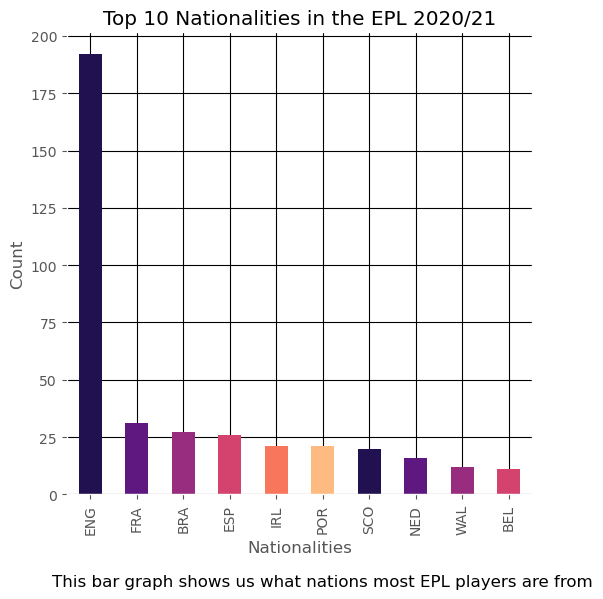

In [199]:
#data for the bar chart 
nationality = epl_df.groupby('Nationality').size().sort_values(ascending = False)


# Plotting the bar chart
nationality.head(10).plot(kind='bar',
                          color=sns.color_palette('magma'),
                          grid=False,
                          figsize=(6,6))


#texts
plt.title('Top 10 Nationalities in the EPL 2020/21')
plt.xlabel('Nationalities')
plt.ylabel('Count')
description = 'This bar graph shows us what nations most EPL players are from'     
plt.text(5, -40, description, ha='center', fontsize=12)


#aesthetics/get current axis
plt.grid(color='black', linestyle='solid')
plt.gca().set_facecolor(color='white')
                          

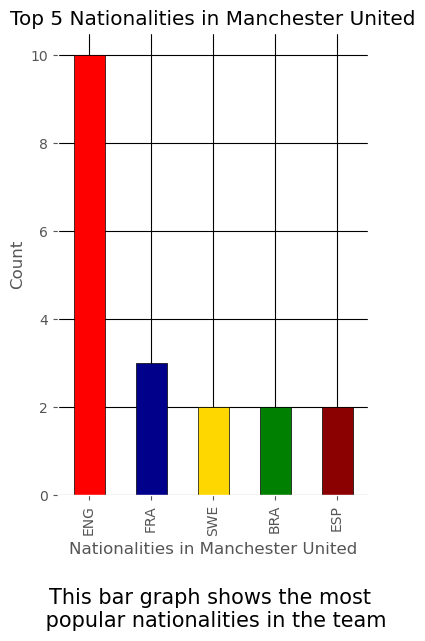

In [220]:

#Data
selected_team = 'Manchester United'
filtered_data = epl_df[epl_df['Club'] == selected_team]
nationality_counts = filtered_data['Nationality'].value_counts()
colors = ['red', 'darkblue','gold', 'green', 'darkred']


#plotting the bar
top_5_nationalities = nationality_counts.head(5).plot(kind='bar',
                                                      color=colors, 
                                                      grid=False, 
                                                      figsize=(4, 6),
                                                      edgecolor='black')

#texts
plt.title(f'Top 5 Nationalities in {selected_team}')
plt.xlabel(f'Nationalities in {selected_team}')
plt.ylabel('Count')
description = 'This bar graph shows the most \n popular nationalities in the team'
plt.text(2, -3, description, fontsize=15, ha='center')

#aesthetics
plt.grid(color='black', linestyle='solid')
plt.gca().set_facecolor(color='white')


plt.show()


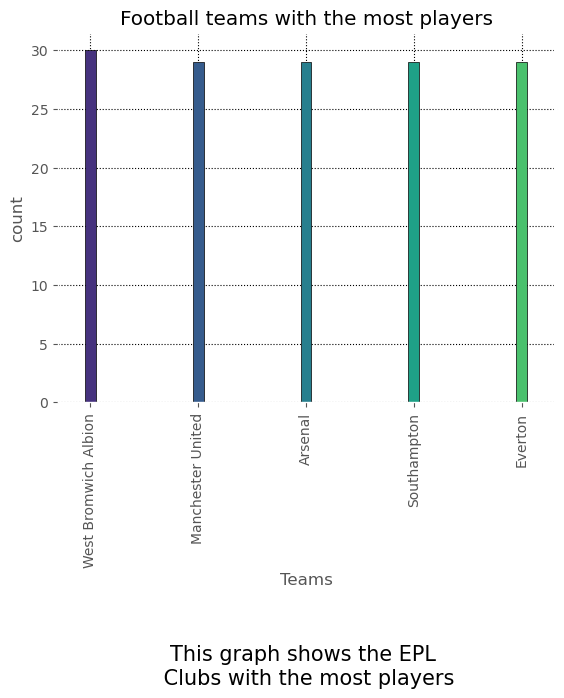

In [238]:
#the data
filtered_data = epl_df['Club'].value_counts()

#plotting the data
filtered_data.nlargest(5).plot(kind='bar', 
                               color=sns.color_palette('viridis'), 
                               edgecolor='black', grid=False, width=0.1)

#text
plt.title('Football teams with the most players')
plt.xlabel('Teams')
plt.ylabel('count')
description = 'This graph shows the EPL \n Clubs with the most players'
plt.text(2, -24, description, ha='center', fontsize=15)

#aesthetics
plt.grid(color='black', linestyle='dotted')
plt.gca().set_facecolor(color='white')





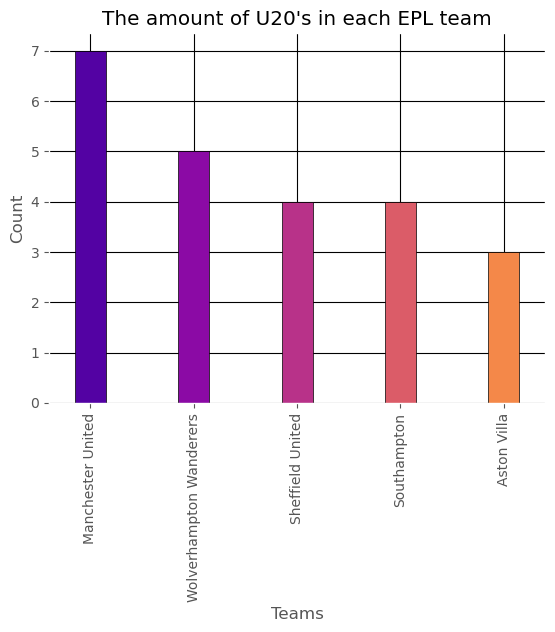

In [244]:
#total under 20 players from each epl club

players_under_20 = epl_df[epl_df['Age'] <20]

players_under_20['Club'].value_counts().nlargest(5).plot(kind='bar', 
                                                         color=sns.color_palette('plasma'),
                                                         edgecolor='black', grid=False,width=0.3 )


plt.title("The amount of U20's in each EPL team")
plt.xlabel('Teams')
plt.ylabel('Count')

plt.grid(color='black', linestyle='solid')
plt.gca().set_facecolor(color='white')



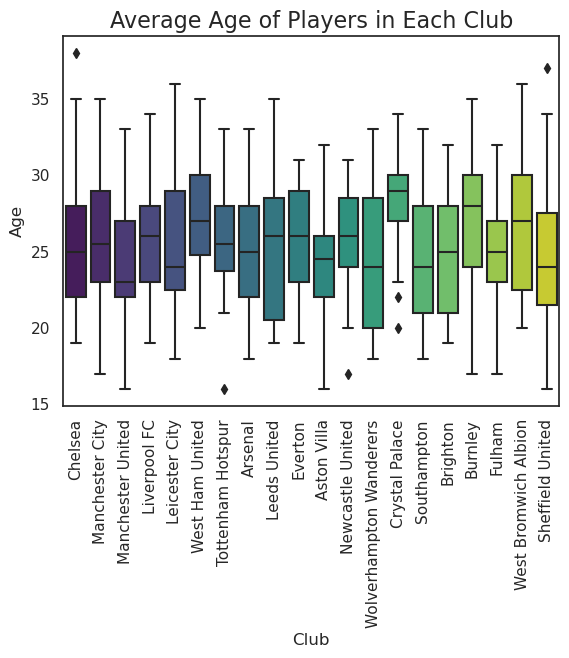

In [283]:
#make the box plot   

sns.boxplot(x='Club', y='Age', data=epl_df, palette='viridis')

# Text
plt.title('Average Age of Players in Each Club', fontsize=16)
plt.xlabel('Club', fontsize=12)
plt.ylabel('Age', fontsize=12)

#aesthetics
plt.gca().set_facecolor(color='white')
plt.xticks(rotation=90)

plt.show()



<Figure size 600x600 with 0 Axes>

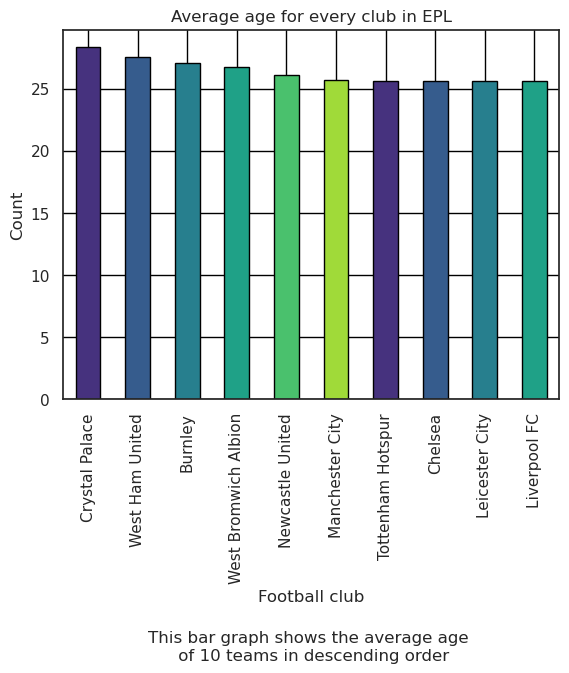

<Figure size 600x600 with 0 Axes>

In [288]:


#make the data and plot
average_age_by_club = epl_df.groupby('Club')['Age'].mean().nlargest(10).plot(kind='bar',
                                                                             color=sns.color_palette('viridis'), 
                                                                             edgecolor='black')

#text
plt.title('Average age for every club in EPL')
plt.xlabel('Football club')
plt.ylabel('Count')
description = 'This bar graph shows the average age \n of 10 teams in descending order'
plt.text(4.5, -21, description, ha='center')

#aesthetics
plt.grid(color='black', linestyle='solid')
plt.gca().set_facecolor(color='white')
plt.figure(figsize=(6,6))


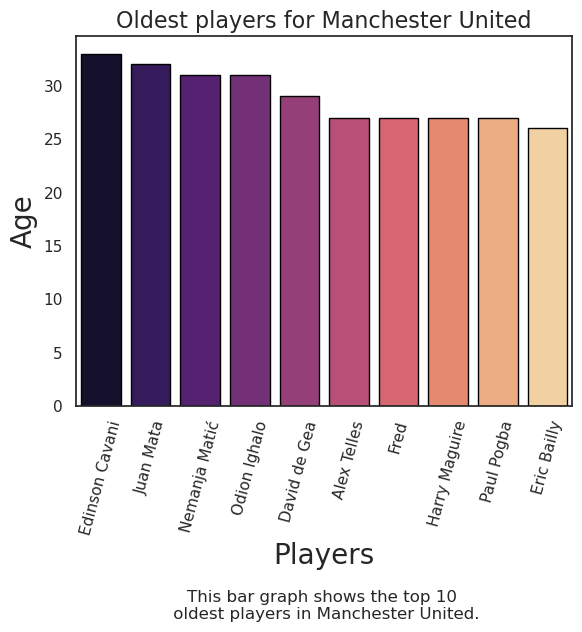

In [306]:
# Filter the data for the specific club you want to focus on
specific_club = 'Manchester United'
specific_club_data = epl_df[epl_df['Club'] == specific_club]
oldest_players = specific_club_data.groupby('Name')['Age'].sum().nlargest(10).reset_index()

# Creating the bar plot
graph = sns.barplot(x='Name', y='Age', data=oldest_players,
                    palette='magma',edgecolor='black')

#text
plt.title(f'Oldest players for {specific_club}', fontsize=16)
graph.set_xlabel('Players', fontsize=20)
graph.set_ylabel('Age', fontsize=20)
plt.xticks(rotation=75)
description = f'This bar graph shows the top 10 \n oldest players in {specific_club}.'
plt.text(4.5, -20, description, ha='center')


plt.show()


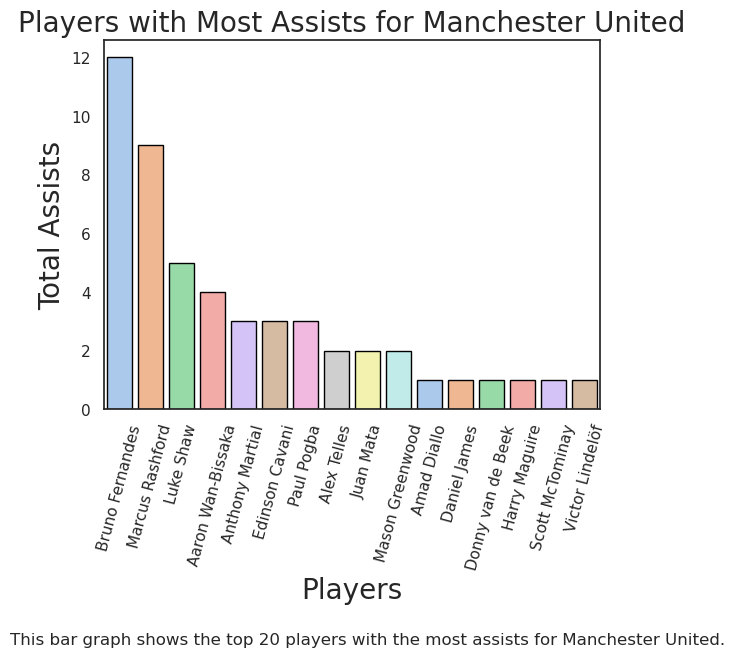

In [321]:
#gather the data 
specific_club = 'Manchester United'
specific_club_data = epl_df[epl_df['Club'] == specific_club]
total_assists_by_player = specific_club_data.groupby('Name')['Assists'].sum().nlargest(10).reset_index()

# Creating the bar plot
graph = sns.barplot(x='Name', y='Assists', data=top_players_by_assists,
                    palette='pastel',edgecolor='black')

#text
plt.title(f'Players with Most Assists for {specific_club}', fontsize=20)
description = f'This bar graph shows the top 20 players with the most assists for {specific_club}.'
plt.text(8, -8, description, ha='center')
graph.set_xlabel('Players', fontsize=20)
graph.set_ylabel('Total Assists', fontsize=20)
plt.xticks(rotation=75)


plt.show()


<Figure size 1200x600 with 0 Axes>

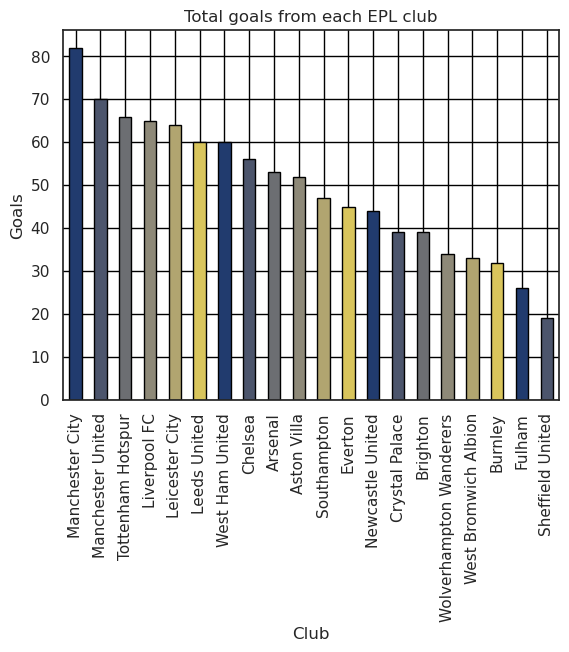

<Figure size 1200x600 with 0 Axes>

In [335]:
#make plot
total_goals_by_club = epl_df.groupby('Club')['Goals'].sum().nlargest(20).plot(kind='bar',
                                                                              color=sns.color_palette('cividis'), 
                                                                              edgecolor='black', grid=False)

#text
plt.title('Total goals from each EPL club')
plt.xlabel('Club')
plt.ylabel('Goals')

#aesthetics
plt.grid(color='black', linestyle='solid')
plt.gca().set_facecolor(color='white')
plt.figure(figsize=(12, 6)) 


Text(10, -43, 'This bar graph shows the amount of assists from each premier league team \n My guess was that manchester city or liverpool would be leading')

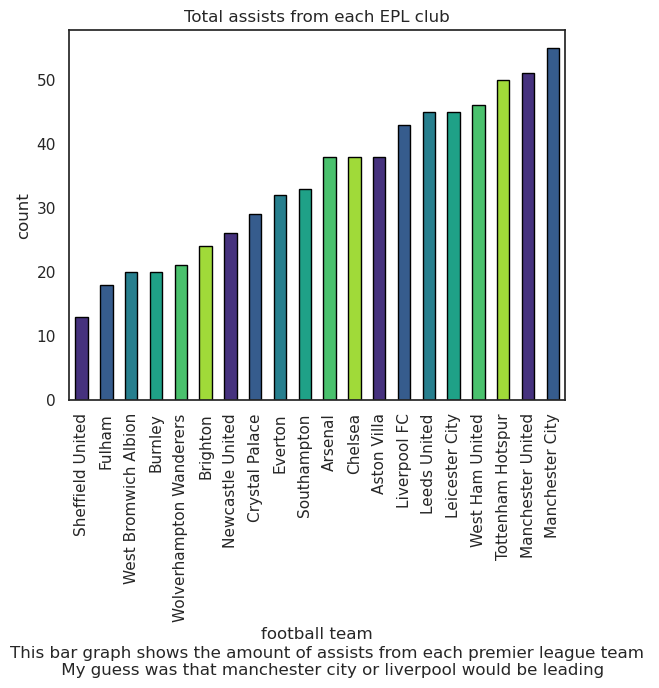

In [341]:
# total assists from each club in ascending order

#plot
ax = epl_df.groupby('Club')['Assists'].sum().nsmallest(20).plot(kind='bar', color=sns.color_palette('viridis'), grid=False, edgecolor='black')

#text
plt.title('Total assists from each EPL club')
plt.xlabel('football team')
plt.ylabel('count')
description = 'This bar graph shows the amount of assists from each premier league team \n My guess was that manchester city or liverpool would be leading'                                                                            
plt.text(10, -43, description, ha='center')


                                                                                                                                                                                                                                                                                           

Text(0.5, 1.0, 'Plot of clubs and their total Goals')

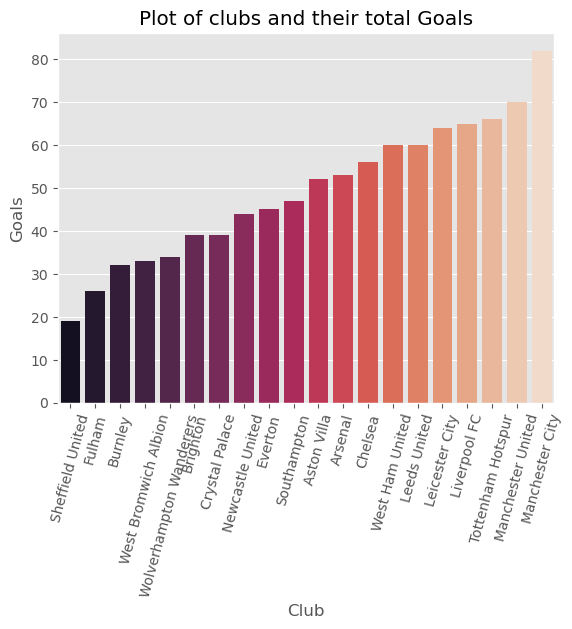

In [135]:
total_goals_by_club = epl_df.groupby('Club')['Goals'].sum().reset_index()

axis = sns.barplot(x='Club', y='Goals', data=total_goals_by_club.sort_values('Goals'), palette='rocket')

plt.title('Plot of clubs and their total Goals')
axis.set_xlabel('Club')
axis.set_ylabel('Goals')

plt.xticks(rotation=75)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Sheffield United'),
  Text(1, 0, 'Fulham'),
  Text(2, 0, 'West Bromwich Albion'),
  Text(3, 0, 'Burnley'),
  Text(4, 0, 'Wolverhampton Wanderers'),
  Text(5, 0, 'Brighton'),
  Text(6, 0, 'Newcastle United'),
  Text(7, 0, 'Crystal Palace'),
  Text(8, 0, 'Everton'),
  Text(9, 0, 'Southampton'),
  Text(10, 0, 'Arsenal'),
  Text(11, 0, 'Chelsea'),
  Text(12, 0, 'Aston Villa'),
  Text(13, 0, 'Liverpool FC'),
  Text(14, 0, 'Leeds United'),
  Text(15, 0, 'Leicester City'),
  Text(16, 0, 'West Ham United'),
  Text(17, 0, 'Tottenham Hotspur'),
  Text(18, 0, 'Manchester United'),
  Text(19, 0, 'Manchester City')])

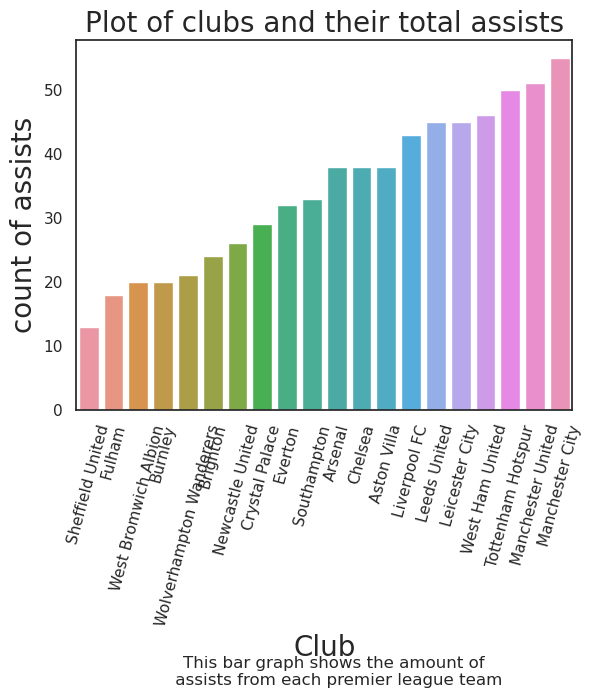

In [343]:
total_assists_by_club = epl_df.groupby('Club')['Assists'].sum().reset_index()

my_graph = sns.barplot(x = 'Club', y = 'Assists', data = total_assists_by_club.sort_values('Assists'))

plt.title('Plot of clubs and their total assists', fontsize=20)
my_graph.set_xlabel('Club', fontsize=20)
my_graph.set_ylabel('count of assists', fontsize=20)
description = 'This bar graph shows the amount of \n assists from each premier league team'
plt.text(10, -43, description, ha='center')

plt.xticks(rotation=75)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Diogo Jota'),
  Text(1, 0, 'Kelechi Iheanacho'),
  Text(2, 0, 'Dominic Calvert-Lewin'),
  Text(3, 0, 'Bruno Fernandes'),
  Text(4, 0, 'Anthony Elanga'),
  Text(5, 0, 'Gareth Bale'),
  Text(6, 0, 'Jesse Lingard'),
  Text(7, 0, 'Joe Willock'),
  Text(8, 0, 'Mohamed Salah'),
  Text(9, 0, 'Harry Kane')])

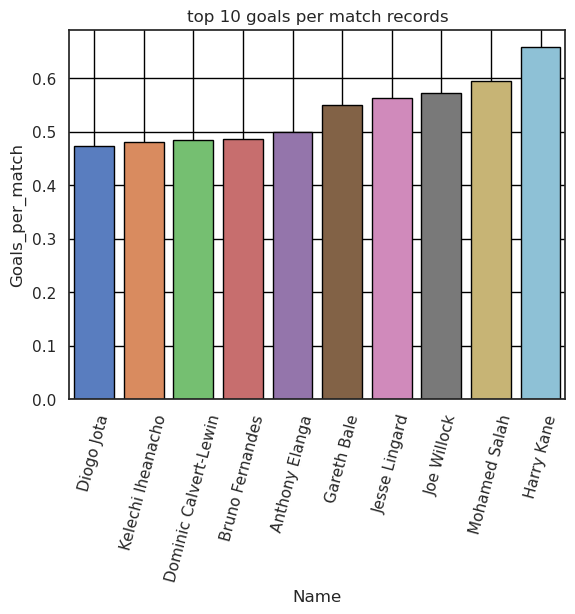

In [348]:
#Goals per match 

top10goals_per_match = epl_df[['Name', 'Goals_per_match','Matches_played', 'Goals']].nlargest(n=10, columns='Goals_per_match')
top10goals_per_match

my_graph = sns.barplot(x='Name', y='Goals_per_match', data = top10goals_per_match.sort_values('Goals_per_match'),palette='muted', edgecolor='black')

my_graph.set_xlabel('Name')
my_graph.set_ylabel('Goals_per_match')
plt.title('top 10 goals per match records')

my_graph.grid(False)
plt.grid(color='black', linestyle='solid')
plt.xticks(rotation=75)




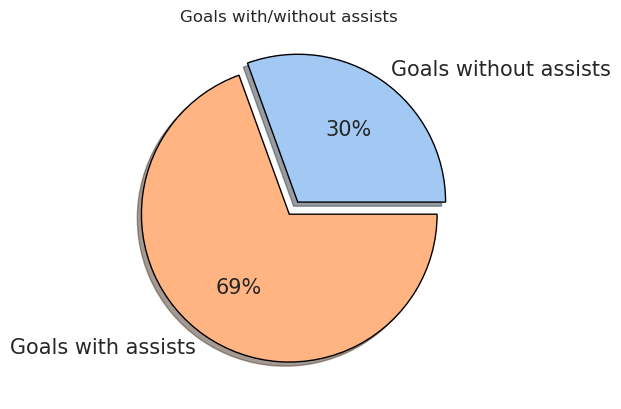

In [360]:
# Pie chart - goals without assists and goals with assists 

#data
total_goals = epl_df['Goals'].sum()
assists = epl_df['Assists'].sum()
data = [total_goals - assists, assists]
labels = ['Goals without assists', 'Goals with assists' ]
explode = [0.1, 0]

#text
plt.title('Goals with/without assists')

#pie
plt.pie(data, labels=labels, colors=sns.color_palette('pastel'),explode=explode,shadow=True, autopct = '%.d%%', wedgeprops={'edgecolor':'black'}, textprops={'fontsize': 15})
plt.show()




 

Text(0.5, 1.0, 'top 10 yellow cards')

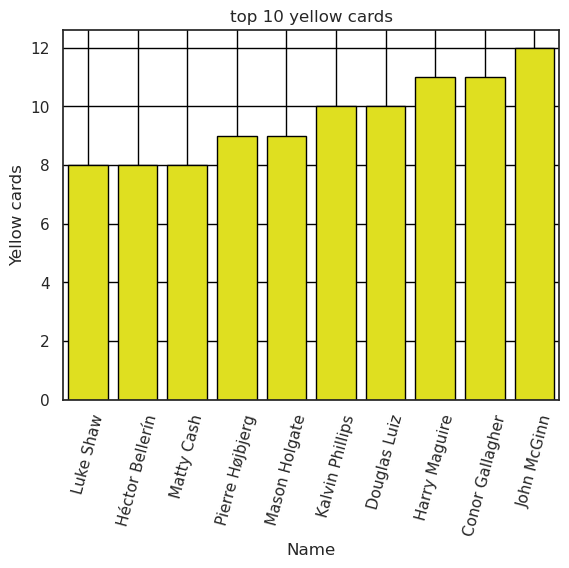

In [361]:
#Top 10 players with most yellow cards

top10players_yellowcards = epl_df[['Name', 'Yellow_Cards',]].nlargest(n=10, columns='Yellow_Cards')

my_graph = sns.barplot(x='Name', y='Yellow_Cards', data = top10players_yellowcards.sort_values('Yellow_Cards'), edgecolor='black', color='yellow')

plt.title('top 10 yellow cards')
my_graph.set_xlabel('Name')
my_graph.set_ylabel('Yellow cards')

my_graph.grid(False)
plt.grid(color='black', linestyle='solid')
plt.gca().set_facecolor(color='white')
plt.xticks(rotation=75)





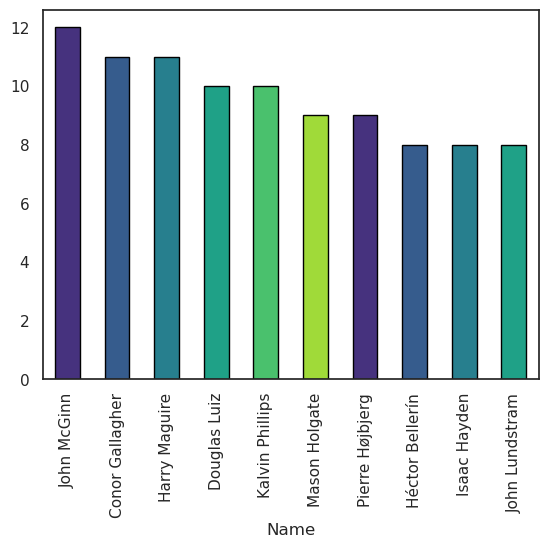

In [380]:
#Top 10 players with most yellow cards

top_yellows_clubs = epl_df.groupby('Name')['Yellow_Cards'].sum().nlargest(10).plot(kind='bar', color=sns.color_palette('viridis'), grid=False, edgecolor='black')


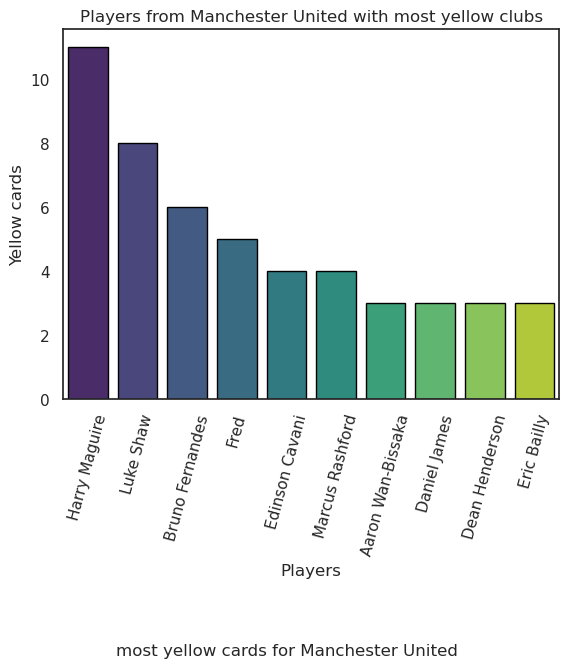

In [362]:
specific_club = 'Manchester United'
specific_club_data = epl_df[epl_df['Club'] == specific_club]
total_yellow = specific_club_data.groupby('Name')['Yellow_Cards'].sum().reset_index()
total_yellow = total_yellow.nlarg
est(10, 'Yellow_Cards')

graph = sns.barplot(x='Name', y='Yellow_Cards', data=total_yellow, palette='viridis', edgecolor='black')

graph.set_xlabel('Players')
graph.set_ylabel('Yellow cards')
description = f'most yellow cards for {specific_club}'
plt.text(4,-8, description, ha='center')

plt.xticks(rotation=75)
plt.title(f'Players from {specific_club} with most yellow clubs')


         
plt.show()